<a href="https://colab.research.google.com/github/sn-hebbar99/WorldCup-WT-Project/blob/master/On_Cross_site_scripting_XSS_dataset_for_Deep_learning_XSS_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Used


*   epochs = 5
*   batch_size = 64

*   loss='categorical_crossentropy'
*   optimizer='adam'


*   activation='softmax'

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,SpatialDropout1D

In [13]:
df=pd.read_csv('/content/gdrive/My Drive/Final Year Project/Phase1/ISA2/Dataset/Cross site scripting/Cross site scripting XSS dataset for Deep learning/XSS_dataset.csv')
print(df.shape)
df.head()

(13686, 3)


,Unnamed: 0,Sentence,Label
0,0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,2,"\t </span> <span class=""reference-text"">Steeri...",0
3,3,"\t </span> <span class=""reference-text""><cite ...",0
4,4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [14]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each request.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(df['Sentence'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9239 unique tokens.


In [18]:
X = tokenizer.texts_to_sequences(df['Sentence'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (13686, 250)


In [41]:
Y = pd.get_dummies(df['Label']).values
print('Shape of label tensor:', Y.shape)
print(Y)

Shape of label tensor: (13686, 2)
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [1 0]
 [1 0]]


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(12317, 250) (12317, 2)
(1369, 250) (1369, 2)


In [43]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history=model.fit(X_train,Y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test,Y_test))

Epoch 1/5
193/193 [==============================] - 145s 740ms/step - loss: 0.4416 - accuracy: 0.8242 - val_loss: 0.0305 - val_accuracy: 0.9934
Epoch 2/5
193/193 [==============================] - 142s 736ms/step - loss: 0.0315 - accuracy: 0.9914 - val_loss: 0.0139 - val_accuracy: 0.9971
Epoch 3/5
193/193 [==============================] - 142s 736ms/step - loss: 0.0143 - accuracy: 0.9964 - val_loss: 0.0118 - val_accuracy: 0.9971
Epoch 4/5
193/193 [==============================] - 142s 736ms/step - loss: 0.0079 - accuracy: 0.9984 - val_loss: 0.0081 - val_accuracy: 0.9985
Epoch 5/5
193/193 [==============================] - 143s 739ms/step - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.0149 - val_accuracy: 0.9971


In [45]:
result=model.predict(X_test)

In [46]:
print(result.shape)
print(Y_test.shape)

(1369, 2)
(1369, 2)


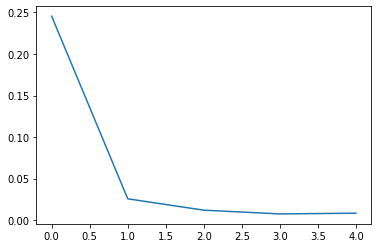

In [49]:
plt.plot(history.history['loss'])

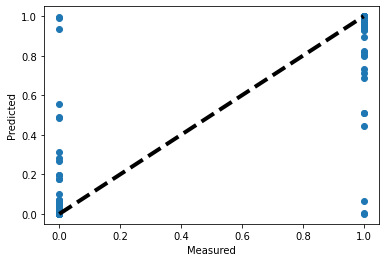

In [48]:
#plt.scatter(range(-1,1),result,c='r')
#plt.scatter(range(-1,1),Y_test,c='g')
plt.scatter()
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()])
plt.ylim([0, plt.ylim()])
plt.show()